### Bibliotecas

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

### Dataframe

In [109]:
dt = pd.read_csv("merged_data.csv")
dt

,Title,Type,ReleaseYear,FinalYear,Network,Label/Studio,Genre,Rating,Adaptation,Artist,ReleaseMonth,Director,Runtime,NumOfCriticReviews,CriticScore
0,Game of Thrones,Tv-Show,2011,2019,HBO,Warner Bros.,"Drama, Fantasy",TV-MA,Based on a book,None,None,None,None,None,Excellent
1,Breaking Bad,Tv-Show,2008,2013,AMC,Sony Pictures Television,Drama,TV-MA,Original,None,None,None,None,None,Excellent
2,Friends,Tv-Show,1994,2004,NBC,Warner Bros.,Comedy,TV-PG,Original,None,None,None,None,None,Good
3,The Sopranos,Tv-Show,1999,2007,HBO,Warner Bros.,Drama,TV-MA,Original,None,None,None,None,None,Excellent
4,Stranger Things,Tv-Show,2016,2022,Netflix,None,"Horror, Science Fiction",None,Based on a book,None,None,None,None,None,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,The Spectacular Now,Movie,2013,None,None,A24,Romance,R,None,None,August,James Ponsoldt,95 min,42.0,Good
902,Safety Not Guaranteed,Movie,2012,None,None,FilmDistrict,Comedy,R,None,None,June,Colin Trevorrow,86 min,31.0,Good
903,Like Crazy,Movie,2011,None,None,Paramount Vantage,Romance,PG-13,None,None,October,Drake Doremus,90 min,38.0,Mediocre
904,The Art of Getting By,Movie,2011,None,None,Fox Searchlight Pictures,Romance,PG-13,None,None,June,Gavin Wiesen,84 min,28.0,Bad


### Conversão de atributos nominais em numéricos 

In [110]:
def label(dataframe):
    label_encoder = LabelEncoder()
    for column in dataframe.columns:
        # Verificar se a coluna é do tipo 'object' (categórica)
        if dataframe[column].dtype == 'object':
            # Aplicar a codificação LabelEncoder à coluna
            dataframe[column] = label_encoder.fit_transform(dataframe[column])
    return dataframe

In [111]:
label(dt)

,Title,Type,ReleaseYear,FinalYear,Network,Label/Studio,Genre,Rating,Adaptation,Artist,ReleaseMonth,Director,Runtime,NumOfCriticReviews,CriticScore
0,113,2,2011,13,13,195,29,10,1,48,8,55,72,39,1
1,52,2,2008,8,2,167,27,10,8,48,8,55,72,39,1
2,107,2,1994,2,16,195,13,11,8,48,8,55,72,39,2
3,388,2,1999,5,13,195,27,10,8,48,8,55,72,39,1
4,258,2,2016,16,17,122,53,3,1,48,8,55,72,39,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,390,1,2013,17,19,7,77,7,7,48,1,30,67,27,2
902,232,1,2012,17,19,69,13,7,7,48,5,10,61,17,2
903,173,1,2011,17,19,138,77,6,7,48,10,16,63,23,3
904,274,1,2011,17,19,71,77,6,7,48,5,23,60,15,0


### Training e Test Set

In [112]:
X = dt.loc[:, dt.columns != 'CriticScore'].values
y = dt['CriticScore'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Árvore de Decisão

In [78]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

### Acurácia

In [113]:
accuracy_score(y_test, y_pred_decision_tree)

0.8676470588235294

### Precisão

In [114]:
precision_score(y_test, y_pred_decision_tree, average='macro')

0.8547373893736123

### Revocação

In [115]:
recall_score(y_test, y_pred_decision_tree, average='macro')

0.8604957883848086

### F1-Score

In [116]:
f1_score(y_test, y_pred_decision_tree, average='macro')

0.8563401559454191

### Confusion Matrix

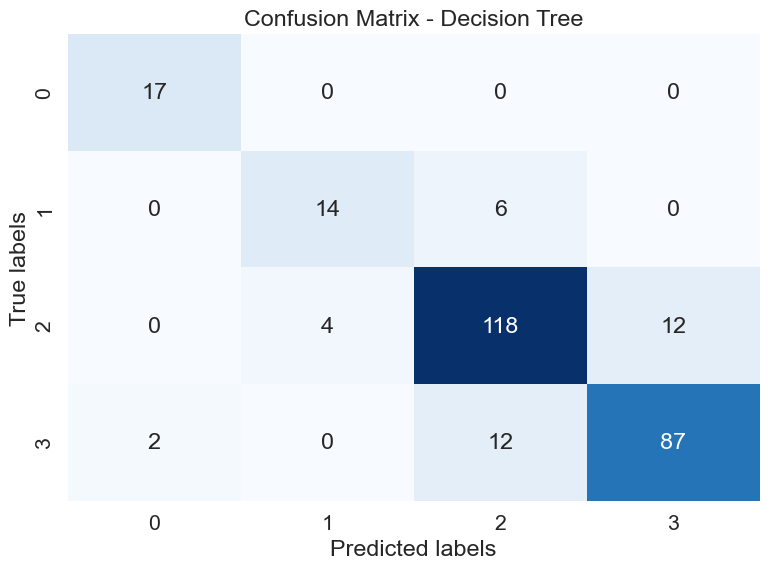

In [117]:
decision_tree_cm = confusion_matrix(y_test, y_pred_decision_tree)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)

sns.heatmap(decision_tree_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Decision Tree")

plt.tight_layout()
plt.show()

### Classification Report

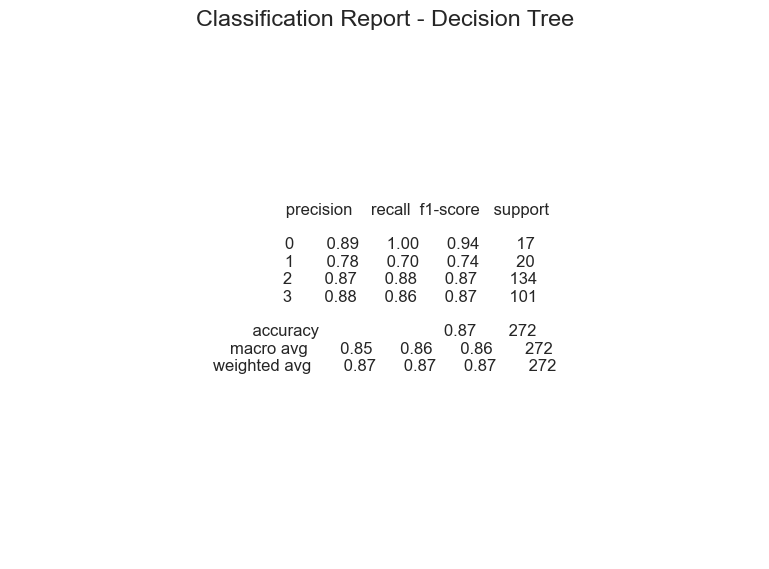

In [118]:
report = classification_report(y_test, y_pred_decision_tree)

plt.figure(figsize=(8, 6))

plt.text(0.5, 0.5, report, horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.axis('off')
plt.title('Classification Report - Decision Tree')

plt.tight_layout()
plt.show()

# K-NN

In [85]:
knn = KNeighborsClassifier(n_neighbors=5)
fit = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

### Acurácia

In [119]:
accuracy_score(y_test, y_pred_knn)

0.5330882352941176

### Precisão

In [123]:
precision_score(y_test, y_pred_knn, average='macro')

0.39862588652482267

### Revocação

In [124]:
recall_score(y_test, y_pred_knn, average='macro')

0.39391260789819105

### F1-Score

In [125]:
f1_score(y_test, y_pred_knn, average='macro')

0.39590014997692663

### Confusion Matrix

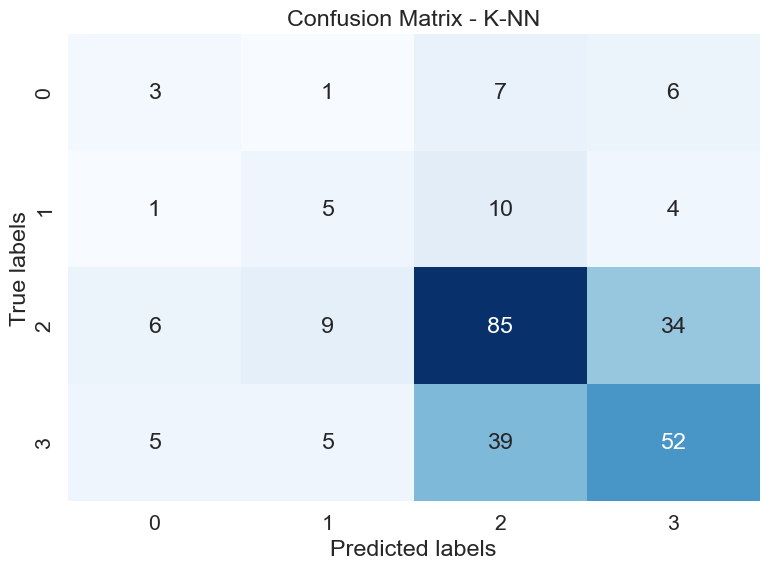

In [126]:
cm_sklearn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)

sns.heatmap(cm_sklearn, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title('Confusion Matrix - K-NN')

plt.tight_layout()
plt.show()

### Classification Report

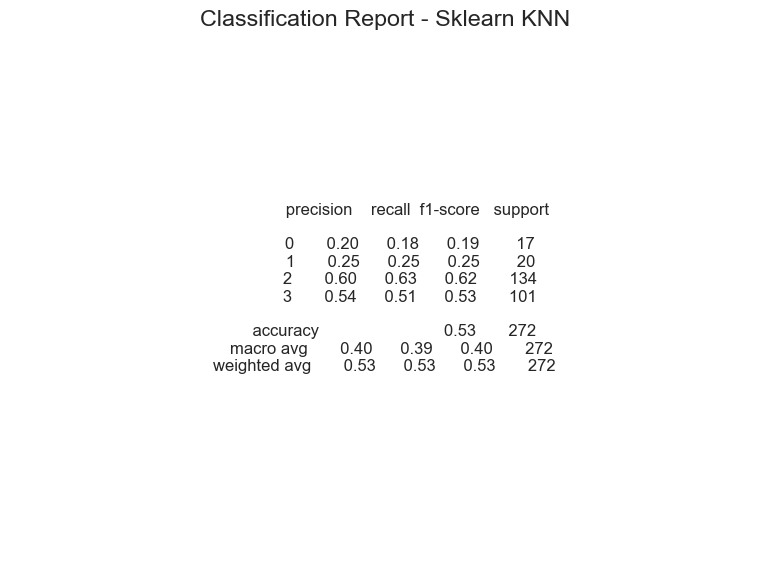

In [127]:
report = classification_report(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))

plt.text(0.5, 0.5, report, horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.axis('off')
plt.title('Classification Report - Sklearn KNN')

plt.tight_layout()
plt.show()


### Encontrar o melhor k tendo em conta a acurácia

In [128]:
def find_k_knn(X, y, k_max):
    k_values = range(1, k_max + 1)
    scores = []

    for i in k_values:
        knn = KNeighborsClassifier(i)
        score = np.mean(cross_val_score(knn, X, y, cv=5,scoring='accuracy'))
        scores.append(score)

    # Plotting the results
    plt.plot(k_values, scores, marker='o')
    plt.xlabel("k Values")
    plt.ylabel("Cross-Validation Accuracy Score")
    plt.title("Finding the Best k for KNN")
    plt.show()

    print("Best k for knn: ", k_values[np.argmax(scores)])

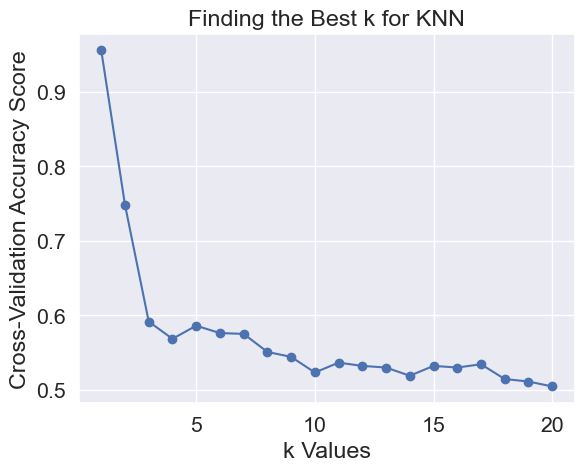

Best k for knn:  1


In [129]:
find_k_knn(X,y,20)

# Comparação dos dois algoritmos com k-fold

In [130]:
def k_fold_cross_validation(model, X, y, k):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracy_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = model()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    return accuracy_scores


def show_fold_cross_validation(dt_accuracy, knn_accuracy):
    fig, ax = plt.subplots()
    ax.boxplot([dt_accuracy, knn_accuracy])
    ax.set_xticklabels(['Decision Trees', 'KNN'])
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy Scores of K-Fold Cross-Validation for Decision Trees and KNN')
    plt.show()


def show_mean_dev(dt_accuracy, knn_accuracy):
    mean_accuracy_knn = np.mean(knn_accuracy)
    std_accuracy_knn = np.std(knn_accuracy)
    
    mean_accuracy_dt = np.mean(dt_accuracy)
    std_accuracy_dt = np.std(dt_accuracy)
    
    fig, ax = plt.subplots()
    ax.bar(['Decision Trees', 'KNN'], [mean_accuracy_dt, mean_accuracy_knn], yerr=[std_accuracy_dt, std_accuracy_knn])
    ax.set_ylabel('Accuracy')
    ax.set_title('Mean Accuracy and Standard Deviation Comparison')
    
    ax.text(0, 0.05, f'Mean: {mean_accuracy_dt:.2f}\nStd: {std_accuracy_dt:.2f}', ha='center')
    ax.text(1, 0.05, f'Mean: {mean_accuracy_knn:.2f}\nStd: {std_accuracy_knn:.2f}', ha='center')
    
    plt.show()

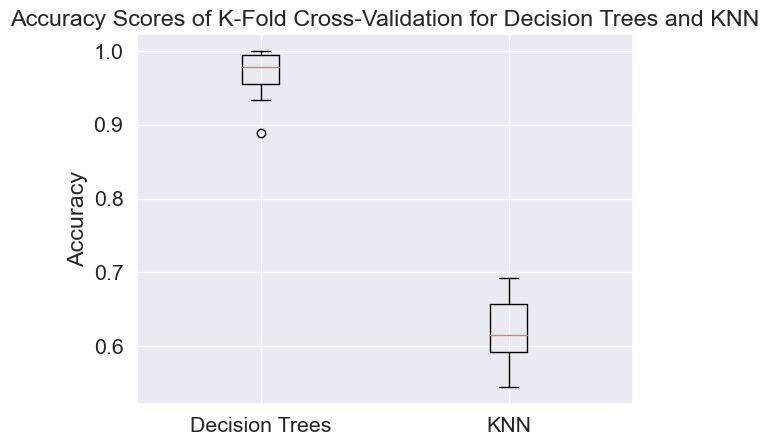

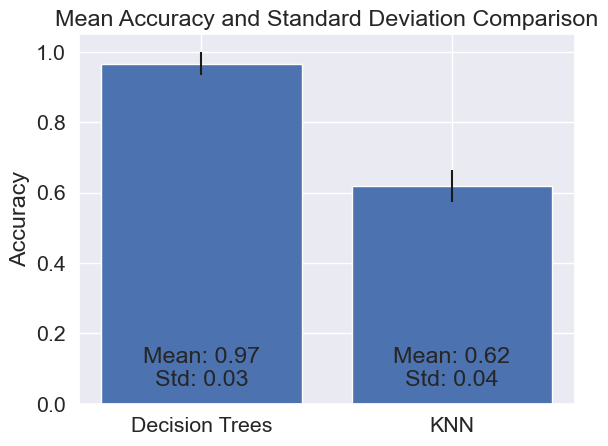

In [131]:
dt_accuracy = k_fold_cross_validation(DecisionTreeClassifier, X, y, k=10)
knn_accuracy = k_fold_cross_validation(KNeighborsClassifier, X, y, k=10)

show_fold_cross_validation(dt_accuracy, knn_accuracy)
show_mean_dev(dt_accuracy, knn_accuracy)